In [1]:
import os
from IPython.core.display import SVG
import pyomo.environ as pyo
import idaes
from idaes.core.solvers import use_idaes_solver_configuration_defaults
import idaes.core.util.scaling as iscale
import soec_design_flowsheet

In [2]:
use_idaes_solver_configuration_defaults()
idaes.cfg.ipopt.options.nlp_scaling_method = "user-scaling"

In [3]:
m = pyo.ConcreteModel()
m.fs = soec_design_flowsheet.SoecDesignFlowsheet(default={"dynamic":False})
iscale.calculate_scaling_factors(m)
m.fs.initialize()

2022-02-23 18:22:53 [INFO] idaes.init.fs.sweep_compressor.control_volume.properties_in: Starting initialization
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.control_volume.properties_in: Property initialization: optimal - Optimal Solution Found.
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.control_volume.properties_out: Starting initialization
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.control_volume.properties_out: Property initialization: optimal - Optimal Solution Found.
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.control_volume.properties_out: Property package initialization: optimal - Optimal Solution Found.
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.properties_isentropic: Starting initialization
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.properties_isentropic: Property initialization: optimal - Optimal Solution Found.
2022-02-23 18:22:54 [INFO] idaes.init.fs.sweep_compressor.properties_isentropic

In [4]:
solver = pyo.SolverFactory("ipopt")

In [5]:
res = solver.solve(m, tee=True)

Ipopt 3.13.2: nlp_scaling_method=user-scaling
tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale s

In [6]:
for c in m.component_data_objects(pyo.Constraint):
    r = abs(c.body() - c.upper)
    if  r > 1e-4:
        print(f"{c} {r}")

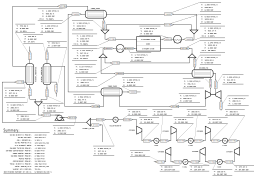

In [7]:
display(SVG(m.fs.write_pfd()))

In [8]:
streams_df = m.fs.streams_dataframe()
display(streams_df)

,mass flow (kg/s),mole flow (kmol/s),mole percent Ar (%),mole percent CO2 (%),mole percent H2 (%),mole percent H2O (%),mole percent N2 (%),mole percent O2 (%),pressure (bar),temperature (K),vapor fraction (%),volumetric flow (m**3/s)
feed01,22.03803,1.263158,NaN,NaN,3.553299,96.446701,NaN,NaN,5.99989,923.16569,NaN,16.119174
feed01b,22.03803,1.263158,NaN,NaN,3.553299,96.446701,NaN,NaN,5.99989,1000.0,NaN,17.474938
feed02,21.618336,1.2,NaN,NaN,NaN,100,NaN,NaN,6.0,918.890035,100.0,15.245862
feed02b,21.618336,1.2,NaN,NaN,0.0,100.0,NaN,NaN,6.0,918.890035,NaN,15.237754
feed03,21.618336,1.2,NaN,NaN,NaN,100,NaN,NaN,6.0,568.725836,100.0,9.314584
feed04,21.618336,1.2,NaN,NaN,NaN,100,NaN,NaN,6.0,520.0,100.0,8.459585
hstrm01,8.393889,1.263158,NaN,NaN,71.06599,28.93401,NaN,NaN,5.99989,1023.0,NaN,17.917506
hstrm02,0.419694,0.063158,NaN,NaN,71.06599,28.93401,NaN,NaN,5.99989,1023.0,NaN,0.895875
hstrm03,7.974195,1.2,NaN,NaN,71.06599,28.93401,NaN,NaN,5.99989,1023.0,NaN,17.02163
hstrm04,7.974195,1.2,NaN,NaN,71.06599,28.93401,NaN,NaN,5.99989,605.807795,NaN,10.067894


In [9]:
jac, nlp = iscale.get_jacobian(m, scaled=True)
print("Extreme Jacobian entries:")
for i in iscale.extreme_jacobian_entries(jac=jac, nlp=nlp, large=100):
    print(f"    {i[0]:.2e}, [{i[1]}, {i[2]}]")
print("Unscaled constraints:")
for c in iscale.unscaled_constraints_generator(m):
    print(f"    {c}")
print("Scaled constraints by factor:")
for c, s in iscale.constraints_with_scale_factor_generator(m):
    print(f"    {c}, {s}")
print("Badly scaled variables:")
for v, sv in iscale.badly_scaled_var_generator(m, large=1e2, small=1e-2, zero=1e-12):
    print(f"    {v} -- {sv} -- {iscale.get_scaling_factor(v)}")
print(f"Jacobian Condition Number: {iscale.jacobian_cond(jac=jac):.2e}")

Extreme Jacobian entries:
    9.48e-05, [fs.soec.cell_potential_eqn[0.0], fs.soec.electrolysis_reactor.control_volume.properties_in[0.0].pressure]
    7.01e-06, [fs.soec.cell_potential_eqn[0.0], fs.soec.o2_seperator.h2_strm_state[0.0].pressure]
    1.57e-05, [fs.soec.cell_potential_eqn[0.0], fs.soec.o2_mixer.sweep_strm_state[0.0].pressure]
    1.87e-05, [fs.soec.cell_potential_eqn[0.0], fs.soec.sweep_heater.control_volume.properties_out[0.0].pressure]
    6.99e-06, [fs.soec.electrolysis_reactor.control_volume.enthalpy_balances[0.0], fs.soec.electrolysis_reactor.control_volume.properties_out[0.0].pressure]
    3.65e-05, [fs.soec.o2_mixer.material_mixing_equations[0.0,CO2], fs.soec.o2_mixer.sweep_strm_state[0.0].flow_mol_phase[Vap]]
    2.92e-05, [fs.soec.o2_mixer.material_mixing_equations[0.0,CO2], fs.soec.o2_mixer.mixed_state[0.0].flow_mol_phase[Vap]]
    3.84e-05, [fs.soec.o2_mixer.enthalpy_mixing_equations[0.0], fs.soec.o2_mixer.o2_strm_state[0.0].pressure]
    2.92e-05, [fs.soec.swe

In [10]:
m.fs.feed_hx01.shell_outlet.display()

shell_outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 1200.0000000000002}
         : mole_frac_comp : {(0.0, 'H2'): 0.7106598984771575, (0.0, 'H2O'): 0.2893401015228426}
         :       pressure : {0.0: 599988.9851201975}
         :    temperature : {0.0: 605.8077952723621}


In [11]:
m.fs.feed_hx01.tube.properties_out[0].temperature.display()
m.fs.feed_hx01.shell.properties_out[0].temperature.display()

temperature : Size=1
    Key  : Value
    None : 918.8900352894401
temperature : State temperature
    Size=1, Index=None, Units=K
    Key  : Lower  : Value             : Upper : Fixed : Stale : Domain
    None : 273.15 : 605.8077952723621 :  2500 : False : False : NonNegativeReals


In [12]:
m.fs.soec.cell_potential.display()

cell_potential : Electric potential for a single cell
    Size=1, Index=fs._time, Units=V
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
    0.0 :  None : 1.3009189755298598 :  None : False : False :  Reals


In [13]:
m.fs.write_pfd(fname="soec_flow_prelim.svg")
streams_df.to_csv("soec_flow_prelim.csv")

In [14]:
m.fs.cmp01.outlet.display()

outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 852.7918781725891}
         : mole_frac_comp : {(0.0, 'H2'): 1.0}
         :       pressure : {0.0: 1163978.6311331834}
         :    temperature : {0.0: 373.8998501021002}


In [15]:
m.fs.feed_hx02.shell_inlet.display()

shell_inlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 1926.3959390862942}
         : mole_frac_comp : {(0.0, 'Ar'): 0.007163636363636363, (0.0, 'CO2'): 0.00023359683794466407, (0.0, 'H2O'): 0.007708695652173915, (0.0, 'N2'): 0.6020569169960475, (0.0, 'O2'): 0.38283715415019776}
         :       pressure : {0.0: 289730.12930703413}
         :    temperature : {0.0: 600.0}


In [16]:
m.fs.feed_heater.outlet.display()
m.fs.sweep_heater.outlet.display()

outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 1263.157894736842}
         : mole_frac_comp : {(0.0, 'H2'): 0.03553299492385791, (0.0, 'H2O'): 0.9644670050761421}
         :       pressure : {0.0: 599988.9851201975}
         :    temperature : {0.0: 1000}
outlet : Size=1
    Key  : Name           : Value
    None :       flow_mol : {0.0: 1714.0439932318104}
         : mole_frac_comp : {(0.0, 'Ar'): 0.008945705824284304, (0.0, 'CO2'): 0.0002917077986179664, (0.0, 'H2O'): 0.009626357354392892, (0.0, 'N2'): 0.7518282329713721, (0.0, 'O2'): 0.22930799605133267}
         :       pressure : {0.0: 599988.9881244516}
         :    temperature : {0.0: 1000}
